In [1]:
%reload_ext autoreload
%autoreload 2
from data_preparation import prepara_data
from fastai import *
from fastai.vision import *
from fastai.docs import *

# Prepare Data and Metrics

In [ ]:
prepare_data()

In [ ]:
def mae_compute(input:Tensor, targs:Tensor) -> Rank0Tensor:
    "Compute mae with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = input.argmax(dim=1).view(n,-1).tolist()
    targs = targs.view(n,-1).tolist()
    
    total_mae = 0.
    for p, t in zip(input, targs): 
        p = int(data.classes[p[0]])
        t = int(data.classes[t[0]])
        total_mae += abs(p-t)
        
    avg_mae = float(total_mae) / n
    
    avg_mae = torch.FloatTensor([avg_mae])[0]
    
    return avg_mae

# Train on several datasets

## IMDB

In [5]:
data = image_data_from_folder('data/processed/imdb/', ds_tfms=get_transforms(), tfms=imagenet_norm, size=128)

In [7]:
learn = ConvLearner(data, tvm.resnet101, metrics=[mae_compute, accuracy])
learn.fit_one_cycle(3)
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-5,3e-4))

Total time: 15:21
epoch  train loss  valid loss  mae_compute  accuracy
0      3.527971    3.867008    7.448535     0.084147  (05:08)
1      3.403712    4.287673    9.348234     0.019159  (05:06)
2      3.335670    4.136790    8.584899     0.024042  (05:06)



Total time: 1:24:24
epoch  train loss  valid loss  mae_compute  accuracy
0      3.358384    3.854771    6.806912     0.032307  (07:01)
1      3.333170    4.095901    7.712246     0.041698  (07:00)
2      3.320854    4.058573    7.689332     0.032682  (07:01)
3      3.276305    4.213713    8.763712     0.018783  (07:00)
4      3.232641    3.917166    6.327573     0.046206  (07:02)
5      3.182200    4.255878    9.315552     0.035312  (07:03)
6      3.098983    4.109913    8.150263     0.040571  (07:01)
7      3.041107    3.970604    7.084898     0.043201  (07:01)
8      2.956775    4.090667    7.524418     0.042074  (07:02)
9      2.900583    4.281519    8.332081     0.033434  (07:03)
10     2.837275    4.320031    8.675432     0.035312  (07:01)
11     2.781979    4.344025    8.988730     0.032307  (07:02)



In [8]:
learn.fit_one_cycle(3, slice(1e-5,3e-4))

Total time: 21:07
epoch  train loss  valid loss  mae_compute  accuracy
0      2.995299    4.273396    7.235161     0.051465  (07:02)
1      2.922015    4.426714    8.987979     0.036063  (07:02)
2      2.752081    4.302331    8.369271     0.046206  (07:02)



In [9]:
learn.save(name='resnet101_imdb')

## UTKFace

In [10]:
data = image_data_from_folder('data/processed/utk/', ds_tfms=get_transforms(), tfms=imagenet_norm, size=128)

In [ ]:
learn = ConvLearner(data, tvm.resnet101, metrics=[mae_compute, accuracy])
learn.load('./data/processed/imdb/models/resnet101_imdb')
learn.fit_one_cycle(3)
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-5,3e-4))

In [13]:
learn.save(name='resnet101_utk')

## APPA-REAL

In [14]:
data = image_data_from_folder('data/processed/appa-real/', ds_tfms=get_transforms(), tfms=imagenet_norm, size=128)

In [15]:
learn = ConvLearner(data, tvm.resnet101, metrics=[mae_compute, accuracy])
learn.load('./data/processed/utk/models/resnet101_utk')
learn.fit_one_cycle(3)
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-5,3e-4))

Total time: 04:04
epoch  train loss  valid loss  mae_compute  accuracy
0      4.551877    4.161513    7.737791     0.061608  (00:31)
1      4.135350    3.950242    7.541698     0.060481  (00:19)
2      3.814757    3.728340    6.813298     0.066491  (00:19)
3      3.621587    3.532015    6.037566     0.070999  (00:19)
4      3.486438    3.460380    5.696845     0.081142  (00:19)
5      3.418863    3.462276    5.646882     0.074005  (00:19)
6      3.363403    3.460653    5.654395     0.067994  (00:19)
7      3.329887    3.452932    5.561608     0.071375  (00:19)
8      3.343524    3.415367    5.410594     0.072126  (00:19)
9      3.293978    3.410460    5.413223     0.077010  (00:19)
10     3.305071    3.413420    5.430503     0.070999  (00:19)
11     3.307604    3.408834    5.367393     0.073253  (00:19)



In [16]:
learn.save('resnet101_appareal_5.36')

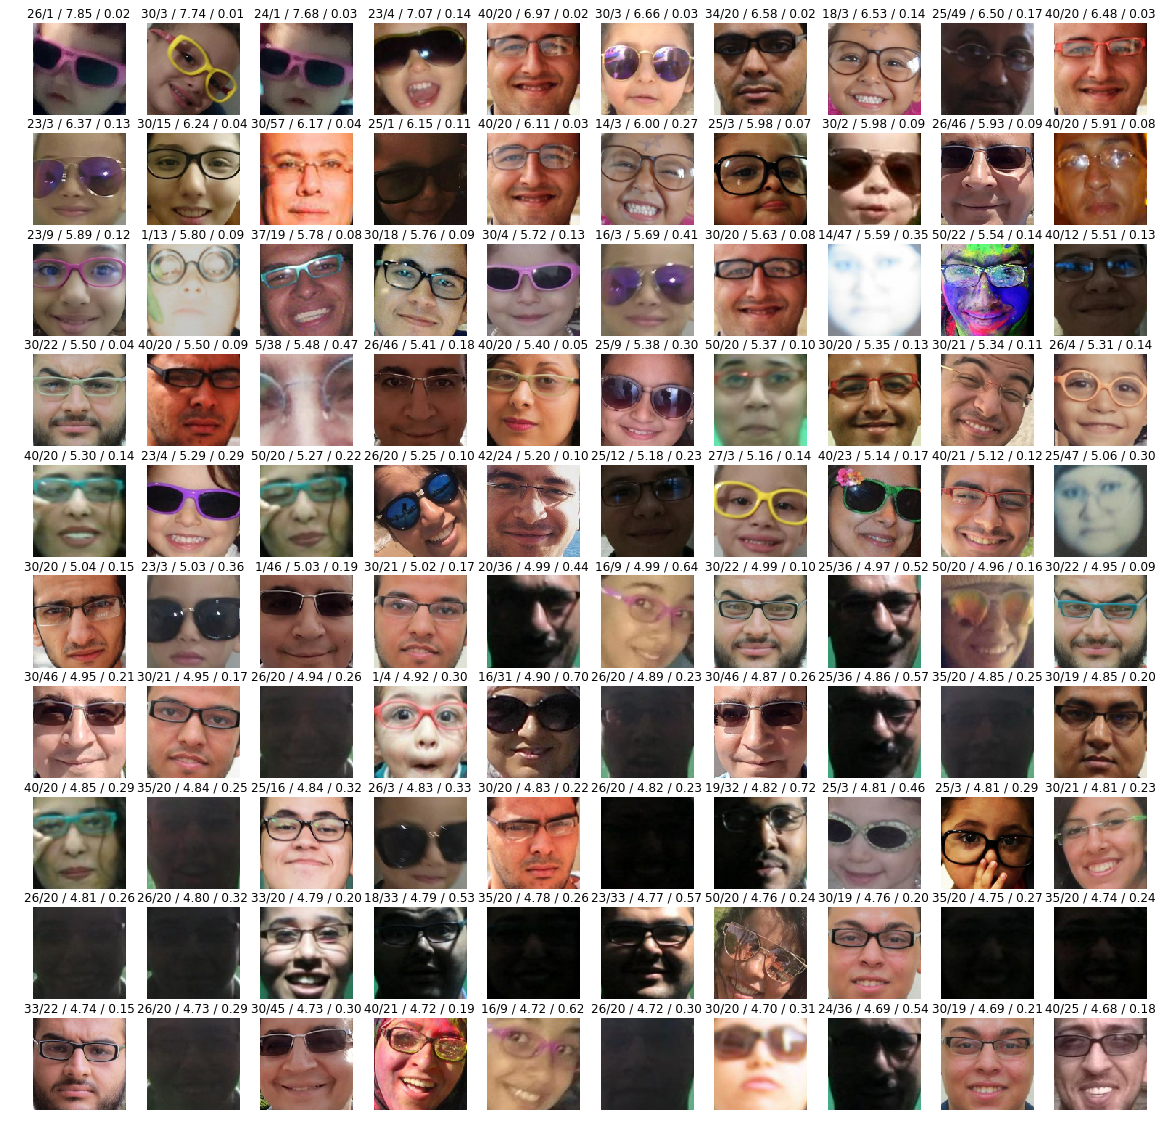

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(100, figsize=(20,20))

In [20]:
learn.fit_one_cycle(12, slice(1e-5,3e-4))

Total time: 03:52
epoch  train loss  valid loss  mae_compute  accuracy
0      3.295066    3.412595    5.431255     0.070624  (00:19)
1      3.283646    3.387978    5.376784     0.077761  (00:19)
2      3.286290    3.396956    5.368896     0.071375  (00:19)
3      3.265275    3.392785    5.384673     0.067994  (00:19)
4      3.250371    3.381105    5.349361     0.073253  (00:19)
5      3.220479    3.353887    5.223141     0.078512  (00:19)
6      3.208965    3.381227    5.450789     0.069872  (00:19)
7      3.188363    3.370250    5.400826     0.073253  (00:19)
8      3.187744    3.369115    5.321187     0.067243  (00:19)
9      3.177642    3.375471    5.339219     0.067618  (00:19)
10     3.180007    3.372131    5.348234     0.067994  (00:19)
11     3.177794    3.381111    5.450789     0.069121  (00:19)

